## Setup

First, we will connect to the correct runtime environment. Since we we are going to use deep learning, we would really benefit from having a GPU. Therefore, we will connect to a GPU runtime environment.

Select a Python with GPU runtime

- Click on Connect > Change the runtime

![Change runtime](https://drive.google.com/uc?export=view&id=1Rgloj9hRS-FZD9dQFN2IZXwSWs_rd8Rs)

- Select Runtime Python and with a GPU

![Select GPU runtime](https://drive.google.com/uc?export=view&id=13fBkTvz3gmtySh9QQWBDNT_msqD0xOiX)

Next, we install the necessary libraries.

In [ ]:
!pip uninstall torch
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 2.8.0+cu126
Uninstalling torch-2.8.0+cu126:
  Would remove:
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.12/dist-packages/functorch/*
    /usr/local/lib/python3.12/dist-packages/torch-2.8.0+cu126.dist-info/*
    /usr/local/lib/python3.12/dist-packages/torch/*
    /usr/local/lib/python3.12/dist-packages/torchgen/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-2.8.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
 

In [1]:
!pip install "careamics[examples]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 116.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.5/226.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 MB 6.8 MB/s eta 0:00:

In [1]:
# Check if we have the GPU available
import torch
torch.cuda.is_available()

True

Now, we import the necessary libraries.

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import tifffile
from careamics import CAREamist
from careamics.config import create_n2v_configuration
from careamics_portfolio import PortfolioManager
from PIL import Image

We will use example data from the CAREamics framework. To obtain the data, we will use the `careamics_portfolio` library. We will save the data in the `./data` folder of the virtual environment.

In [3]:
# instantiate data portfolio manage
portfolio = PortfolioManager()

# and download the data
root_path = Path("./data")
files = portfolio.denoising.N2V_SEM.download(root_path)

100%|█████████████████████████████████████| 13.0M/13.0M [00:00<00:00, 13.2GB/s]
Unzipping contents of '/content/data/denoising-N2V_SEM' to '/content/data/denoising-N2V_SEM.unzip'


Now, we will define a training and a validation image. We will train our denoising model on image 0, and validate it on image 1. Let's see how these images look like.

Text(0.5, 1.0, 'Validation Image')

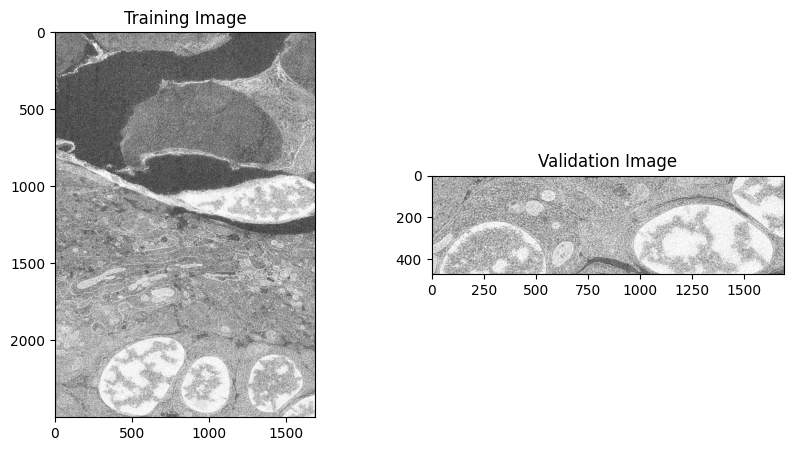

In [4]:
# Load training and validation image and show them side by side
train_image = tifffile.imread(files[0])
val_image = tifffile.imread(files[1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(train_image, cmap="gray")
ax[0].set_title("Training Image")
ax[1].imshow(val_image, cmap="gray")
ax[1].set_title("Validation Image")

Next, we will define the model parameters. CAREamics provides a convenient way to define our configuration using the `create_n2v_configuration` function.

Let's zoom in on some of the parameters:
- `patch_size`: size of image patches that we will use to train the model. This will split up our training image(s) into smaller patches. This way, we can train the model efficiently without overflowing the GPU memory. We will use 64x64 patches.
- `batch_size`: number of patches that we will use to train the model in each iteration. We will use 32 patches. The larger the batch size, the quicker our model will converge. However, a larger batch size also means a larger GPU memory usage.
- `num_epochs`: number of epochs that we will train the model for. This is the number of times that we will iterate over the entire training dataset. We will train for 30 epochs. More epochs gives the model more time to learn. Besides a longer training time, it also increases the risk of overfitting.

If we print the configuration, we can see the full list of parameters. Many of these parameters are set to default values that are generally good choices, so we don't need to specify them for now.

In [5]:
config = create_n2v_configuration(
    experiment_name="p2n2025_n2v_sem",
    data_type="array",
    axes="YX",
    patch_size=(64, 64),
    batch_size=32,
    num_epochs=30,
    use_n2v2=True,
)

print(config)

{'algorithm_config': {'algorithm': 'n2v',
                      'loss': 'n2v',
                      'lr_scheduler': {'name': 'ReduceLROnPlateau',
                                       'parameters': {}},
                      'model': {'architecture': 'UNet',
                                'conv_dims': 2,
                                'depth': 2,
                                'final_activation': 'None',
                                'in_channels': 1,
                                'independent_channels': True,
                                'n2v2': True,
                                'num_channels_init': 32,
                                'num_classes': 1,
                                'use_batch_norm': True},
                      'n2v_config': {'masked_pixel_percentage': 0.2,
                                     'name': 'N2VManipulate',
                                     'remove_center': True,
                                     'roi_size': 11,
                     

With the configuration defined, we can now create the model. We will use the `CAREamics` class to create the model. Depending on the configuration, this will create a model with a different architecture or hyperparameters. We will use the configuration that we defined earlier.

Once created, we can train the model using its `train` method. This method will take the training and validation images as input. All other things going on behind the scenes are taken care of by the `CAREamics` class.

In [6]:
# instantiate a CAREamist
careamist = CAREamist(source=config)

# train
careamist.train(
    train_source=train_image,
    val_source=val_image,
)

No working directory provided. Using current working directory: /content.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
Computed dataset mean: [39216.047], std: [18678.184]
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 324 K  | train
---------------------------------------
324 K     Trainable params
0         Non-trainable params
324 K     Total params
1.298     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (34) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


Now that our model is trained, let's use it to denoise our images. We will first look at the denoising results on the training image.

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

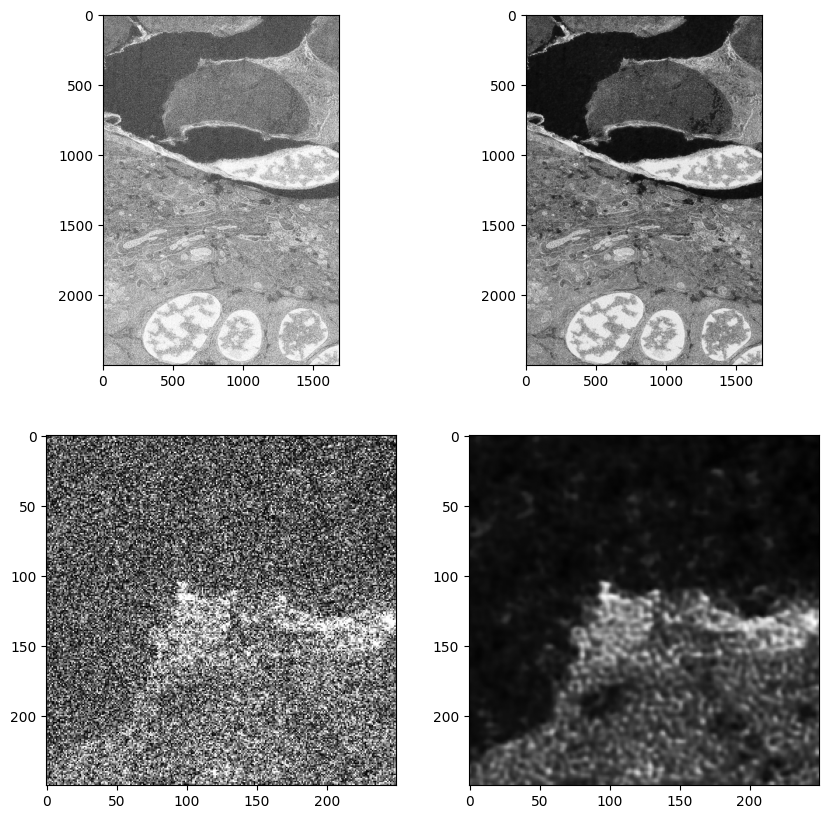

In [7]:
prediction = careamist.predict(source=train_image, tile_size=(256, 256))

# Show the full image and crops
x_start, x_end = 600, 850
y_start, y_end = 200, 450

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(train_image, cmap="gray")
ax[0, 1].imshow(prediction[0].squeeze(), cmap="gray")
ax[1, 0].imshow(train_image[y_start:y_end, x_start:x_end], cmap="gray")
ax[1, 1].imshow(prediction[0].squeeze()[y_start:y_end, x_start:x_end], cmap="gray")